## Demo Class Camera

In [5]:
import matplotlib.pylab as plt
import matplotlib.image
import numpy as np
# from cv2 import putText,imencode,FONT_HERSHEY_SIMPLEX,LINE_4,resize, Canny, addWEight
import cv2
import time
import threading
import os
# append system.path with the folder containing basisklassen_cam,.py
import sys
sys.path.append('./../Software')
from basisklassen_cam import Camera
import ipywidgets as widgets
from IPython.display import display
import Beispiele.image_processing as ip
from datetime import datetime

In [ ]:
Camera?

### OpenCV only

True


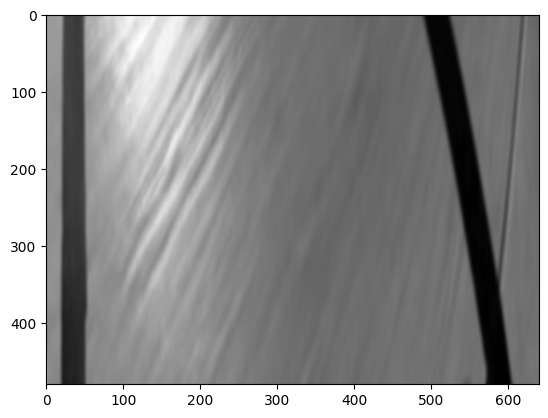

In [46]:
import cv2
vc = cv2.VideoCapture(0)
ret,frame = vc.read()
frame = cv2.flip(frame,-1)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
frame = cv2.blur(frame, (5,5))
#frame = cv2.Canny(frame, 0, 100)
#frame = cv2.normalize(frame, frame, alpha=3, beta=10, norm_type=cv2.NORM_MINMAX)
# threshold=60
# ret,frame = cv2.threshold(frame,threshold,1,cv2.THRESH_BINARY)   # gibt threshold und Resultat zurück
#frame = frame[0:480,0:640].copy()
frame1 = ip.roi(frame, upper=0.6, under=0.2)
print(ret)
plt.imshow(frame1, cmap='gray')



Template <class 'numpy.ndarray'> (100, 540)


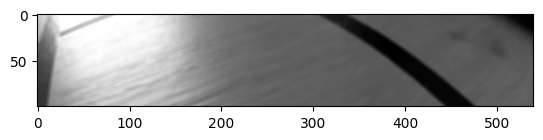

In [47]:
imgTemplate = frame[200:300,50:590].copy()
# threshold=10
# ret,imgTemplate = cv2.threshold(imgTemplate,threshold,1,cv2.THRESH_BINARY)   # gibt threshold und Resultat zurück
plt.imshow(imgTemplate,cmap='gray')
print('Template',type(imgTemplate),imgTemplate.shape)




In [48]:
filename = "images/Linkskurve.png"
cv2.imwrite(filename, imgTemplate)
# matplotlib.image.imsave(filename, imgTemplate, cmap='gray')

True

42.0 267808768.0 (50, 200) (0, 380)
(50, 200)
(590, 300)


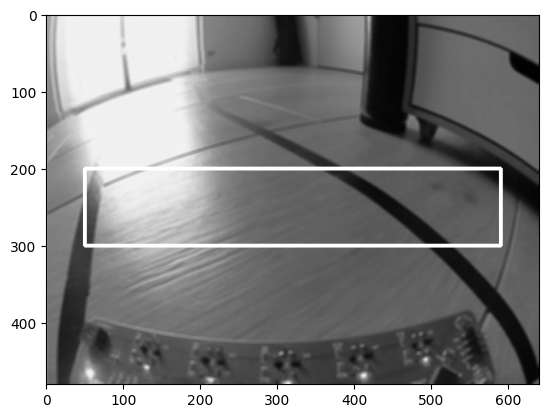

In [50]:
res = cv2.matchTemplate(frame, imgTemplate,cv2.TM_SQDIFF) 
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

top_left = min_loc

#-------------------------
# Zeichnen der Boundary Box
ht,wt = imgTemplate.shape
bottom_right = (top_left[0] + wt, top_left[1] + ht)
img3=cv2.rectangle(frame.copy(), top_left, bottom_right, (255,0,0), 3)
#img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

plt.imshow(img3, cmap='gray')
print(top_left)
print(bottom_right)



In [49]:
vc.release()

In [76]:
bilder_liste = ['images/Gerade.png', 'images/Linkskurve.png', 'images/Rechtskurve.png']
template_liste = []
for i in range(len(bilder_liste)):
    template_liste.append(cv2.imread(bilder_liste[i]))
    print(type(template_liste[i]))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
